## Trabalho referente a AV1 - Matemática para Computação
# Banco de Dados Equipe 10

Equipe:
 - Igor Souza Cruz 2111597
 - Lissandra Martins Moura 2218019
 - Jeosafá Ferreira Do Nascimento 2217282
 - Nicolas Freire Santiago 2218668
 

In [129]:
import pandas as pd
import seaborn as srn
import statistics as sts

%matplotlib inline
import matplotlib_venn as vplt
from matplotlib import pyplot as plt

 Importação de dados CSV referente a alunos, dengue e ônibus:

In [2]:
#Importando dados CSV
alunos = pd.read_csv("alunos.csv", sep=";")
dengue = pd.read_csv("dengue.csv", sep=";")
onibus = pd.read_csv("onibus.csv", sep=";")


# Realização da análise dos dados obtidos e tratamento:

Problemas observados:

- O nome da coluna "Nome de Mae" e "Nome do Pai" estão invertidas;
- Datas em formatações diversas, porém serão deixadas como tal por representar dados que não devem ser alterados;
- A coluna 'Sexo' possui diferentes siglas para se referir ao mesmo objeto;
- 'Nome', 'Nome de Mae' e 'Nome do Pai' aparecem escritos de forma incompleta ou errados, porém serão usados como parametros para identificar igualdade.
- A coluna 'ID' aprensa IDs diferentes em diferentes tabelas paras os mesmos indivíduos.


In [3]:
#Mostrando dados Alunos
alunos.head()

,ID,Nome,Nome da Mae,Nome do Pai,Sexo,Data de Nascimento
0,0,FRANCISCA SALES LIMA,ELISEU CASTRO LIMA,SANDRA SALES CHAGAS,f,10-7-1997 00:00:00
1,1,DARIO MELO CELISMAN,JOAO SILVA CELISMAN,MARIA MELO MARLETE,m,24-3-2022 00:00:00
2,2,ANTONIA SILVA BARBOSA,RAIMUNDO,MARIA SILVA GIRAO,f,68-9-2009 00:00:00
3,3,SAMARA SANTOS MONTEIRO,JOSE,MARIA SANTOS LIDUINA,f,25-4-1999 00:00:00
4,4,JESSICA,FRANCISCO ALMEIDA SOUSA,RAIMUNDA SOCORRO HERMINIO,f,18-11-1998 00:00:00


In [4]:
#Mostrando dados Dengue
dengue.head()

,ID,Nome,Nome da Mae,Nome do Pai,Sexo,Data de Nascimento,Data da Dengue
0,0,MARCIA VASCONCELOS SILVA,JEFFERSON FERREIRA SILVA,MARIA VASCONCELOS LEITE,F,0/2/8976,30/8/1687
1,1,WESLEY SANTOS FILHO,JOAO SILVA FILHO,MARILIA SANTOS MACEDO,M,1/6/1288,30/1/1971
2,2,EVELINE SILVA MIGUEL,FRANCISCO MIGUEL SILVA,MARIA SITVA SIOVP,F,4/10/2002,25/9/2016
3,3,GISELE,IVONALDO FREITAS ALVES,CRISTIANE SANTOS SANTOS,F,13/6/1907,5/8/2011
4,4,GISELKE COELHO OLIVEIRA,GUTEMBERGUE SANTOS OLIVEIRA,MARIA C A,F,18/3/8961,9/10/2079


In [5]:
#Mostrando dados Onibus
onibus.head()

,ID,Nome,Nome da Mae,Nome do Pai,Sexo,Data de Nascimento,Onibus
0,0,LUCAS,EDIBERTO FARIAS MATOS,MFRIA BARAOSFEDREUFA,H,271988,"893, 529, 744, 718, 709"
1,1,PIULO Q F,ANTONIO,MARIA QUEIROZ SANTOS,H,161956,"912, 223, 689, 333, 754, 537, 779, 203, 569"
2,2,FRANCISCO S S,JEOVA OLIVEIRA SILVA,VERANEIDE SANTOS SILVA,H,2471938,"397, 213, 767"
3,3,GERANIO SILVA SOUZA,GONZAGA,ELIZABETH SILVA VALE,H,1101993,"574, 583, 726, 184"
4,4,VALBERLANIA COSTA FREITAS,OSMAR NASCIMENTO FREITAS,ANA COSTA NASCIMENTO,M,101067,"010, 152"


In [6]:
#Tamanho dados Alunos
alunos.shape

(289, 6)

In [7]:
#Tamanho dados Dengue
dengue.shape

(212, 7)

In [8]:
#Tamanho dados Onibus
onibus.shape

(278, 7)

# Analisando dados dos alunos:

In [9]:
#Nome
agrupado = alunos.groupby(['Nome']).size()
agrupado
#281 de 289 valores repetidos ou vazios

Nome
ADILSON SANTOS WELLINGTON    1
ADRIANA G F                  1
ADRIEL FRANCA LOPES          1
ADRIELLE MARIA SANTOS        1
AHEREZA L S                  1
                            ..
WERMESON GORETE OLIVEIRA     1
WEVERLANNE AQUINO BOMFIM     1
WUKA NASOIMENTP AANELHA      1
YEGOR ALVES NETO             1
YUDI SILVA CUNHA             1
Length: 281, dtype: int64

In [10]:
agrupado = alunos.groupby(['Sexo']).size()
agrupado
#nenhuma divergencia observada

Sexo
f    152
m    137
dtype: int64

In [11]:
agrupado = alunos.groupby(['Nome da Mae']).size()
agrupado
#264 de 289 valores repetidos ou vazios

Nome da Mae
ABDORAL                        1
ABELARDO ALMEIDA SOUSA         1
ABERLADO MONTEIRO GUIMARAES    1
AEDRO RIBEIRO SOBRINHO         1
ALFREDO MOURA FERREIRA         1
                              ..
VAULO                          1
VENANCIO SILVA AMARAL          1
VICENTE LIMA CARVALHO          1
WCLLIIGSOJ ALVEU BOFFIM        1
ZUGUIDO C M                    1
Length: 264, dtype: int64

In [12]:
agrupado = alunos.groupby(['Nome do Pai']).size()
agrupado
#266 de 289 valores repetidos ou vazios

Nome do Pai
ADRIANA C S                  1
ALDEVAM EVENICE SAMPAIO      1
ALESNIAAFATIMA SOHZA         1
ALEXYANDRA IVOPETE COSTJ     1
ALEZABETA                    1
                            ..
VANDA ABREU ARAUJO           1
VANIA                        1
VIVIANE CORDEIRO FEITOSA     1
WRANCTMUR OLIVEIRA SANTOS    1
YARPA N R                    1
Length: 266, dtype: int64

In [13]:
#Contamos valores NAN
alunos.isnull().sum()

ID                    0
Nome                  0
Nome da Mae           0
Nome do Pai           0
Sexo                  0
Data de Nascimento    0
dtype: int64

Aparentemente mesmo com nomes repetidos os nomes dos pais não se repetem, ou seja, são pessoas diferentes!

In [14]:
alunos[alunos.duplicated(['Nome'], keep=False)]

,ID,Nome,Nome da Mae,Nome do Pai,Sexo,Data de Nascimento
9,9,MARIA,RPIMUNDO VIANA ALVES,MARGARIDA MARINETE BEZERRA,f,2-7-2044 00:00:00
47,47,MARIA,MANOEL NONATO AVELINO,MARIA C P,f,27-4-0057 00:00:00
83,83,MARIA,RAIMUNOO,ELIANE PEREIRA MARIA,f,9-6-1998 00:00:00
86,86,MARIA,FRANCISCO PEREIRA LIMA,ANTONIA CLEIDE SANTOS,f,9-5-1394 00:00:00
174,174,MARIA,MANOEL OLIVEIRA SILVA,MARIA CARMO SILVA,f,27-8-5087 00:00:00
186,186,FRANCISCO,FRANCISCO F S,FRANCISCA SILVA PRAZERES,m,8-10-2204 00:00:00
226,226,MARIA,PEDRO,DAMIANY,f,20-81-2012 00:00:00
239,239,MARIA,FRANCISCO S T,MARIA PEREIRA CAVALCANTE,f,42-3-1697 00:00:00
248,248,MARIA,JULIO S S,FABIOLA PAULA PEREIRA,f,19-8-1991 00:00:00
281,281,FRANCISCO,EUGENIO ERIVAN ALVES,ELIZONETE JOSE PEREIRA,m,64-4-2012 00:00:00


Corrigindo nome de coluna.

In [15]:
alunos.columns = ['ID','Nome','Nome do Pai','Nome da Mae','Sexo','Data de Nascimento']
#verificando
alunos.head()

,ID,Nome,Nome do Pai,Nome da Mae,Sexo,Data de Nascimento
0,0,FRANCISCA SALES LIMA,ELISEU CASTRO LIMA,SANDRA SALES CHAGAS,f,10-7-1997 00:00:00
1,1,DARIO MELO CELISMAN,JOAO SILVA CELISMAN,MARIA MELO MARLETE,m,24-3-2022 00:00:00
2,2,ANTONIA SILVA BARBOSA,RAIMUNDO,MARIA SILVA GIRAO,f,68-9-2009 00:00:00
3,3,SAMARA SANTOS MONTEIRO,JOSE,MARIA SANTOS LIDUINA,f,25-4-1999 00:00:00
4,4,JESSICA,FRANCISCO ALMEIDA SOUSA,RAIMUNDA SOCORRO HERMINIO,f,18-11-1998 00:00:00


# Analisando dados de Dengue:

In [16]:
agrupado = dengue.groupby(['Nome']).size()
agrupado
#207 de 212 valores repetidos ou vazios

Nome
ADILSON S W               1
ADRIANA ANTONIA KLEBER    1
ADRIELLE MARIA SANTOS     1
ALEXANDRE                 1
ALINE ARAUJO GILBERTO     1
                         ..
WILLIAN                   1
WLADEYLSON COSTA JOSE     1
YLDI OFLVACUNWA           1
YRUNO                     1
YURI MARIA SILVA          1
Length: 207, dtype: int64

In [17]:
agrupado = dengue.groupby(['Nome da Mae']).size()
agrupado
#199 de 212 valores repetidos ou vazios

Nome da Mae
ABELARDO ALMEIDA SOUSA         1
ADALBERTO B L                  1
ADRIANO F S                    1
ALEX NASCIMENTO ARAUJO         1
ALLESSON R S                   1
                              ..
VRANCISCO SILVB SOSSA          1
WELINGTON IDANILDO MACELINO    1
WELLINGTON                     1
YURI CARLOS SOUSA              1
ZACARIAS                       1
Length: 199, dtype: int64

In [106]:
agrupado = dengue.groupby(['Nome do Pai']).size()
agrupado
#199 de 212 valores repetidos ou vazios

Nome do Pai
ABELARDO ALMEIDA SOUSA         1
ADALBERTO B L                  1
ADRIANO F S                    1
ALEX NASCIMENTO ARAUJO         1
ALLESSON R S                   1
                              ..
VRANCISCO SILVB SOSSA          1
WELINGTON IDANILDO MACELINO    1
WELLINGTON                     1
YURI CARLOS SOUSA              1
ZACARIAS                       1
Length: 199, dtype: int64

In [19]:
agrupado = alunos.groupby(['Sexo']).size()
agrupado
#nenhuma divergencia observada

Sexo
f    152
m    137
dtype: int64

In [20]:
#Contamos valores NAN
dengue.isnull().sum()

ID                    0
Nome                  0
Nome da Mae           0
Nome do Pai           0
Sexo                  0
Data de Nascimento    0
Data da Dengue        0
dtype: int64

Aparentemente mesmo com nomes repetidos os nomes dos pais não se repetem, ou seja, são pessoas diferentes.

In [21]:
dengue[dengue.duplicated(['Nome'], keep=False)]

,ID,Nome,Nome da Mae,Nome do Pai,Sexo,Data de Nascimento,Data da Dengue
53,53,ANA,FLAVIO RODRIGUES MESQUITA,MARIA MELO PASSOS,F,29/3/2959,12/7/1994
56,56,MARIA,GREGORIO,SANDRA N F,F,18/09/1865,2/6/5015
65,65,MARIA,JOSE CARLOS MARIA,ANDREIA DUARTE SILVA,F,11/1/1988,43/7/5977
88,88,MARIA,EUGENIO SOUSA SILVA,FRANCISCA,F,5/9/1936,78/3/0013
132,132,MARIA,ANTONSOVALENTIM SINVA,DAMIANA SILVA SILVA,F,19/5/1986,0/2/0009
158,158,MARIA,JOSE SOUSA DOMINGOS,MARIA SILVA NASCIMENTO,F,24/9/9990,15/5/2018
187,187,ANA,ANTONIO S A,LUIZA FERREIRA SILVA,F,5/8/1917,19/9/2977


Corrigindo nome de coluna:

In [22]:
dengue.columns = ['ID','Nome','Nome do Pai','Nome da Mae','Sexo','Data de Nascimento','Data da Dengue']
#verificando
dengue.head()

,ID,Nome,Nome do Pai,Nome da Mae,Sexo,Data de Nascimento,Data da Dengue
0,0,MARCIA VASCONCELOS SILVA,JEFFERSON FERREIRA SILVA,MARIA VASCONCELOS LEITE,F,0/2/8976,30/8/1687
1,1,WESLEY SANTOS FILHO,JOAO SILVA FILHO,MARILIA SANTOS MACEDO,M,1/6/1288,30/1/1971
2,2,EVELINE SILVA MIGUEL,FRANCISCO MIGUEL SILVA,MARIA SITVA SIOVP,F,4/10/2002,25/9/2016
3,3,GISELE,IVONALDO FREITAS ALVES,CRISTIANE SANTOS SANTOS,F,13/6/1907,5/8/2011
4,4,GISELKE COELHO OLIVEIRA,GUTEMBERGUE SANTOS OLIVEIRA,MARIA C A,F,18/3/8961,9/10/2079


# Analisando colunas dos dados de Ônibus

In [23]:
#Nome
agrupado = onibus.groupby(['Nome']).size()
agrupado
#271 de 278 valores repetidos ou vazios

Nome
AJOKVANDFO OLIVEIRA XOBRITHO    1
ALEFFY GOMES SOUSA              1
ALEXANDRA PEREIQA BIRES         1
ALEXANDRE NASCIMENTO SILVA      1
ANA                             2
                               ..
WESLEY SANTOS FILHO             1
WESLEY SILVA SANTIAGO           1
WHGNER S S                      1
WILLIAN EDILANE LIMA            1
WLADMIR IVANILDA SOUZA          1
Length: 271, dtype: int64

In [24]:
agrupado = onibus.groupby(['Nome da Mae']).size()
agrupado
#263 de 278 valores repetidos ou vazios

Nome da Mae
ADALBERTO BENEDITO LIMA     1
ADRIANO                     1
ADRIANO SILVA DOMINGOS      1
ALBERTO                     1
ALFLODIZIO SANTOS FARIAS    1
                           ..
WELINGTON I M               1
WOACIR LIMA CASTRO          1
YURI CARLOS SOUSA           1
ZACARIAS ROSA ALBERTO       1
ZUGUIDOCOSEA MARCVAVO       1
Length: 263, dtype: int64

In [25]:
agrupado = onibus.groupby(['Nome do Pai']).size()
agrupado
#256 de 278 valores repetidos ou vazios

Nome do Pai
ADRIANA MORENO CARMO     1
ALAIDE SILVA MIRANDA     1
ALBERTINA P A            1
ALDEVAM E S              1
ANA COSTA NASCIMENTO     1
                        ..
VIRGINIA GOMES SANTOS    1
YNTVNIA SOUSA TELES      1
ZAIRA SILGA GCNWALWES    1
ZARIA LOHO SOUSA         1
ZULMIRA L S              1
Length: 256, dtype: int64

In [26]:
agrupado = onibus.groupby(['Sexo']).size()
agrupado

Sexo
H    115
M    163
dtype: int64

# Padronizar os valores da coluna 'Sexo':

In [27]:
alunos.loc[alunos['Sexo'] == 'f', 'Sexo'] = "F"
alunos.loc[alunos['Sexo'] == 'm', 'Sexo'] = "M"
alunos.head()

,ID,Nome,Nome do Pai,Nome da Mae,Sexo,Data de Nascimento
0,0,FRANCISCA SALES LIMA,ELISEU CASTRO LIMA,SANDRA SALES CHAGAS,F,10-7-1997 00:00:00
1,1,DARIO MELO CELISMAN,JOAO SILVA CELISMAN,MARIA MELO MARLETE,M,24-3-2022 00:00:00
2,2,ANTONIA SILVA BARBOSA,RAIMUNDO,MARIA SILVA GIRAO,F,68-9-2009 00:00:00
3,3,SAMARA SANTOS MONTEIRO,JOSE,MARIA SANTOS LIDUINA,F,25-4-1999 00:00:00
4,4,JESSICA,FRANCISCO ALMEIDA SOUSA,RAIMUNDA SOCORRO HERMINIO,F,18-11-1998 00:00:00


In [28]:
onibus.loc[onibus['Sexo'] == 'H', 'Sexo'] = "M"
onibus.loc[alunos['Sexo'] == 'M', 'Sexo'] = "F"
onibus.head()

,ID,Nome,Nome da Mae,Nome do Pai,Sexo,Data de Nascimento,Onibus
0,0,LUCAS,EDIBERTO FARIAS MATOS,MFRIA BARAOSFEDREUFA,M,271988,"893, 529, 744, 718, 709"
1,1,PIULO Q F,ANTONIO,MARIA QUEIROZ SANTOS,F,161956,"912, 223, 689, 333, 754, 537, 779, 203, 569"
2,2,FRANCISCO S S,JEOVA OLIVEIRA SILVA,VERANEIDE SANTOS SILVA,M,2471938,"397, 213, 767"
3,3,GERANIO SILVA SOUZA,GONZAGA,ELIZABETH SILVA VALE,M,1101993,"574, 583, 726, 184"
4,4,VALBERLANIA COSTA FREITAS,OSMAR NASCIMENTO FREITAS,ANA COSTA NASCIMENTO,M,101067,"010, 152"


# Realizando a combinação dos indivídos em diferentes bancos de dados seguindo orientações:

A prefeitura por meio da coleta de dados de seus sistemas, possui alguns conjuntos de dados e gostaria de explorá-los para apoiar as tomadas de decisão do prefeito e seus secretários. A base de dados da prefeitura conta com dados sobre as áreas da Saúde (dados de cidadãos que tiverem dengue), Mobilidade (dados de cidadãos que andam de ônibus) e Educação (dados de cidadãos matriculados em escolas), essas informações estão em três  arquivos Excel (.csv). Como cientista de dados você deverá fazer:


#  1) Relatório Educação: Informar nome, data de nascimento e id dos cidadãos de XPTO que frequentaram a escola, menos os cidadãos que tiveram dengue.

In [98]:
alunos_com_dengue = pd.merge(alunos,dengue, on=['Nome','Nome da Mae'], how='inner')
alunos_com_dengue

,ID_x,Nome,Nome do Pai_x,Nome da Mae,Sexo_x,Data de Nascimento_x,ID_y,Nome do Pai_y,Sexo_y,Data de Nascimento_y,Data da Dengue
0,11,LEONARDA SILVA BARBOSA,FRAOCCSCO FERREIJA BARBOSV,RAIMARA SILVA ARAUJO,F,16-8-2007 00:00:00,24,FRANCISCE FERREIRA BARBZSA,F,16/8/2077,27/9/2016
1,26,FRANCISCA AURILANE HOLANDA,ALONCO ARAUJO HOLANDA,MARIA AURILANE ARAUJO,F,6-2-2314 00:00:00,20,ALONCO A H,F,6/2/2014,13/2/2079
2,36,WALTER PERREIRA FERREIRA,ANTONIO OLIVEIRA FERREIRA,ANTONIA PERREIRA CHAVES,M,30-3-2007 00:00:00,183,ANTONIO,M,35/7/2025,9/5/2046
3,48,MARIA LOUREIRO TEIXEIRA,FRANCISCO V T,LUZIA LOUREIRO ARAUJO,F,21-3-9397 00:00:00,128,FRANCISCO V T,F,24/3/2997,13/4/2008
4,51,JOSIANY IVONILDE SOUSA,RAIMUNDO,ELISAGELA IVONILDE NAVEGANTES,M,28-11-1695 00:00:00,148,RAIMUNDO,M,22/21/6981,14/16/2005
5,69,ANAIDE SANTOS SILVA,CICERO FERREIRF SILVA,REGINA SANTOS LOPES,F,4-2-4097 00:00:00,57,CICERO FERREIRA SILVA,F,7/0/2108,22/8/2413
6,148,ALINE ARAUJO GILBERTO,RAIMUNDO CARLOS GILBERTO,RAIMUNDA ARAUJO LAURIANO,F,00-0-1997 00:00:00,186,RAIMUNDO C G,F,20/5/1991,3/11/8001


In [126]:
alunos_sem_dengue = alunos[~alunos['Nome da Mae'].isin(combina['Nome da Mae'])]
alunos_sem_dengue

,ID,Nome,Nome do Pai,Nome da Mae,Sexo,Data de Nascimento
0,0,FRANCISCA SALES LIMA,ELISEU CASTRO LIMA,SANDRA SALES CHAGAS,F,10-7-1997 00:00:00
1,1,DARIO MELO CELISMAN,JOAO SILVA CELISMAN,MARIA MELO MARLETE,M,24-3-2022 00:00:00
2,2,ANTONIA SILVA BARBOSA,RAIMUNDO,MARIA SILVA GIRAO,F,68-9-2009 00:00:00
3,3,SAMARA SANTOS MONTEIRO,JOSE,MARIA SANTOS LIDUINA,F,25-4-1999 00:00:00
4,4,JESSICA,FRANCISCO ALMEIDA SOUSA,RAIMUNDA SOCORRO HERMINIO,F,18-11-1998 00:00:00
...,...,...,...,...,...,...
284,284,MARIA L R,FRANCISCO NASCIMENTO ROBERTO,ELIZETH LUCIA SILVA,F,9-0-2008 00:00:00
285,285,ANGELA SILVA SOUSA,RAIMUNDO TEIXEIRA SOUSA,ALEZABETA,F,15-2-2007 00:00:00
286,286,BRUNA GRACAS OLIVEIRA,FRANCISCO RODUIGUES OLIGGIRA,MARIA GRACAS DLVES,F,1-6-5000 00:00:00
287,287,ANTONIO RODRIGUES CASTRO,MOACIR LIMA CASTRO,MARIA RODRIGUES FELIX,M,8-0-6012 00:00:00


In [128]:
alunos_com_dengue.to_csv('alunos_com_dengue.csv', index=False)
alunos_sem_dengue.to_csv('alunos_sem_dengue.csv', index=False)

In [140]:
print('Total de alunos ' + str(len(alunos.groupby(['Nome']).size()))
      + " Alunos com dengue " + str(len(alunos_com_dengue.groupby(['Nome']).size()))
      + " Alunos sem dengue " +  str(len(alunos_sem_dengue.groupby(['Nome']).size()))
      + " Contraíram dengue " +  str(len(dengue.groupby(['Nome']).size())) ## dado importante
     )

Total de alunos 281 Alunos com dengue 7 Alunos sem dengue 274 Contraíram dengue 207


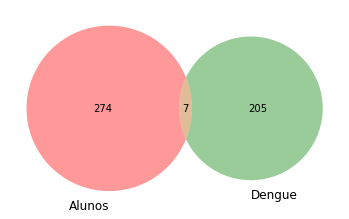

In [134]:
v = vplt.venn2(subsets={'10':274,'01':205,'11':7}, set_labels = ('Alunos', 'Dengue'))
plt.show()